In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test_id=test['PassengerId']


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# shape of the train data
train.shape

(891, 12)

In [8]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
#missing or null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# for the age column, shall fill the null values using the mean,
# embarked shall fill the null with U for unknown
# the cabin,name and ticket column shall be dropped, both will apply to the test and train datasets

In [12]:
#copy data for cleaning
te=test.copy()

In [13]:
tr=train.copy()

In [14]:
te.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
tr.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [16]:

te.fillna(te['Embarked'].mode()[0],inplace=True)

In [17]:
tr.fillna(te['Embarked'].mode()[0],inplace=True)

In [18]:

te['Age'] = pd.to_numeric(te['Age'], errors='coerce')

te.fillna(te['Age'].mean(), inplace=True)

In [19]:
tr['Age'] = pd.to_numeric(tr['Age'], errors='coerce')
tr.fillna(te['Age'].mean(),inplace= True)

In [20]:
#duplicates
tr.duplicated().sum().sum()

0

In [21]:
te.duplicated().sum().sum()

0

In [22]:
te.loc[152, 'Fare']=0

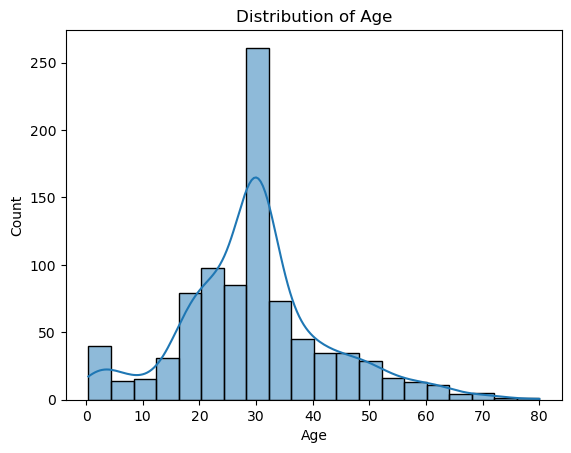

In [23]:
sns.histplot(tr['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

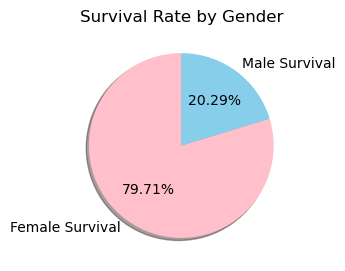

In [24]:
# percentage of gender survival
female=tr.loc[tr['Sex']=='female']['Survived']
female_survived=sum(female)/len(female)*100
male=tr.loc[tr['Sex']=='male']['Survived']
male_survived=sum(male)/len(male)*100

survival=[female_survived, male_survived]

labels = ['Female Survival', 'Male Survival']
colors = ['pink', 'skyblue']

plt.figure(figsize=(3, 3))
plt.pie(survival, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, shadow=True)
plt.title("Survival Rate by Gender")

plt.show()



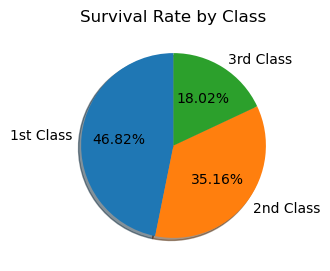

In [25]:
#survival by passenger class
passclass=tr.groupby(['Pclass'])['Survived'].mean()
labels=['1st Class','2nd Class','3rd Class']
plt.figure(figsize=(3, 3))
plt.pie(passclass,labels=labels ,autopct='%1.2f%%', startangle=90, shadow=True)
plt.title("Survival Rate by Class")

plt.show()

In [26]:
# survival by place of embarkment
embark=tr.groupby(['Embarked'])['Survived'].mean()*100
print(f'Percentage of place of embarkment is:,{embark} %')


Percentage of place of embarkment is:,Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64 %


In [27]:
#Modelling


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [29]:
code=LabelEncoder()
encode=['Sex','Embarked']
for x in encode:
    tr[x]=code.fit_transform(tr[x])
    te[x]=code.transform(te[x])
    print(code.classes_)





['female' 'male']
['C' 'Q' 'S']


In [30]:
X=tr.drop('Survived',axis=1)

y=tr['Survived']

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)
model=LogisticRegression(random_state=0,max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [31]:
prediction=model.predict(X_val)

In [32]:
accuracy_score(y_val,prediction)

0.8097014925373134

In [73]:
prediction_test=model.predict(te)
data=pd.DataFrame({'PassengerId':test_id.values,
                  'Survived':prediction_test})
data.to_csv('TestPred.csv', index=False)